# semseg/train

based on [camvid.ipynb](../camvid.ipynb).

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from blueflow import notebooks

from blue_options import string
from blue_objects import objects
from blue_objects.mlflow import cache

from roofAI.host import signature
from roofAI.semseg.interface import train
from roofAI.semseg import Profile
from roofAI.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

/Users/kamangir/git/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
🏛️  roofAI-5.22.1.abcli-9.464.1.blue_objects-5.224.1.blue_options-4.186.1.torch-2.5.1.Python 3.9.6.Darwin 23.6.0..Jupyter-Notebook,
built on 13 January 2025, 11:56:14


In [2]:
dataset_source = "AIRS" # AIRS | CamVid
profile = Profile.VALIDATION

In [3]:
success, dataset_object_name = cache.read(f"roofAI_ingest_{dataset_source}_v1")
assert success
assert dataset_object_name

logger.info(f"dataset_object_name: {dataset_object_name}")

assert objects.download(dataset_object_name)

🏛️  dataset_object_name: roofAI_ingest_AIRS_2023-10-22-15-05-23-13546


In [4]:
model_object_name = objects.unique_object("train-ipynb")

🌀  📂 train-ipynb-2025-01-13-11-56-17-np0nvw


🏛️  RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-10-22-15-05-23-13546): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof
🏛️  SemSegModelTrainer: CamVid -Profile.VALIDATION-> train-ipynb-2025-01-13-11-56-17-np0nvw
🏛️  RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-10-22-15-05-23-13546): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof
🏛️  -> /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/dataset.png


Dataset: 1 class(es): 1
Dataset: 1 item(s).


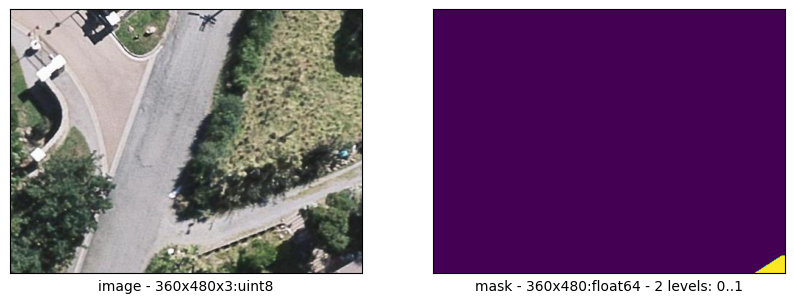

/Users/kamangir/git/.venv/lib/python3.9/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/Users/kamangir/git/.venv/lib/python3.9/site-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/Users/kamangir/git/.venv/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1149: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/Users/kamangir/git/.venv/lib/python3.9/site-packages/albumentations/imgaug/transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", Fu

Dataset: 1 class(es): 1
Dataset: 1 item(s).


🏛️  -> /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/augmented_dataset-00000.png


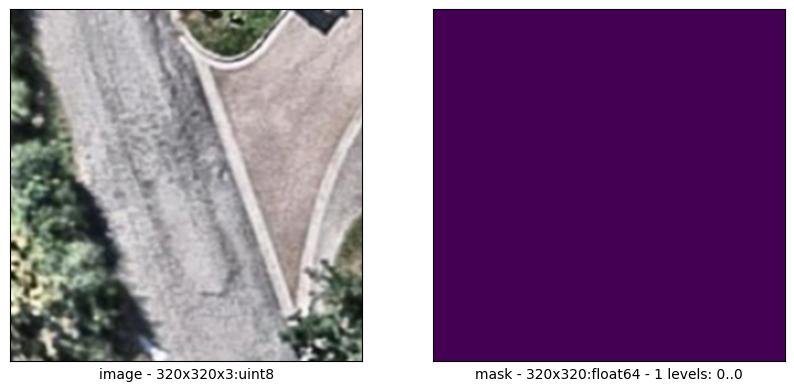

🏛️  SemSegModelTrainer.traincpu -sigmoid:se_resnext50_32x4d-> imagenet[roof]
🏛️  RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-10-22-15-05-23-13546): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof
🏛️  RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-10-22-15-05-23-13546): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof
🏛️  epoch: #1/1


Dataset: 1 class(es): 1
Dataset: 1 item(s).
Dataset: 1 class(es): 1
Dataset: 1 item(s).
valid: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s, dice_loss - 0.9959, iou_score - 2.207e-11]


🏛️  -> /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/model.pth
🏛️  took 1 second(s)


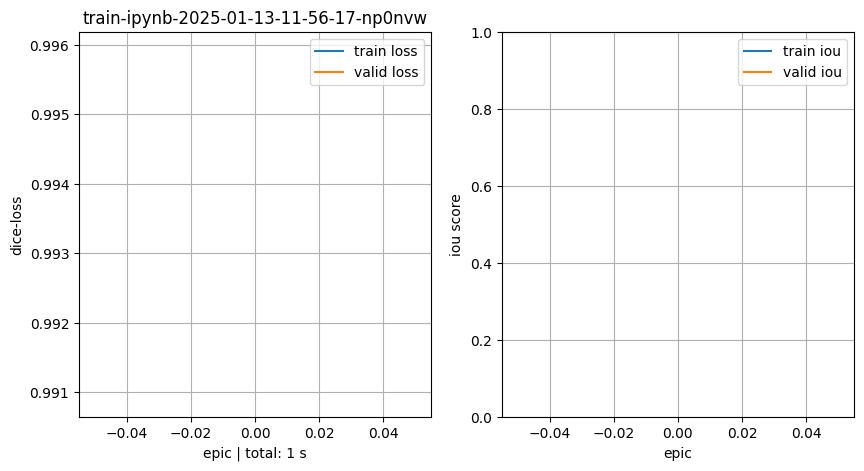

🏛️  SemSegModel.load(/Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/model.pth) on cpu: Profile.VALIDATION
/Users/kamangir/git/roofAI/roofAI/semseg/model.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub 

Dataset: 1 class(es): 1
Dataset: 1 item(s).
valid: 100%|██████████| 1/1 [00:00<00:00,  6.84it/s, dice_loss - 0.8763, iou_score - 0.002678]

🏛️  RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-10-22-15-05-23-13546): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof
🏛️  SemSegModel.predict(AIRS:/Users/kamangir/storage/abcli/roofAI_ingest_AIRS_2023-10-22-15-05-23-13546/SegNet-Tutorial/CamVid/) -cpu-> /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw
🏛️  RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-10-22-15-05-23-13546): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof
🏛️  RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-10-22-15-05-23-13546): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof



Dataset: 1 class(es): 1
Dataset: 1 item(s).
Dataset: 1 class(es): 1
Dataset: 1 item(s).


  0%|          | 0/1 [00:00<?, ?it/s]🏛️  took 104 millisecond(s)
🏛️  23 object(s) found.
🏛️  -> /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/predict-00000.png


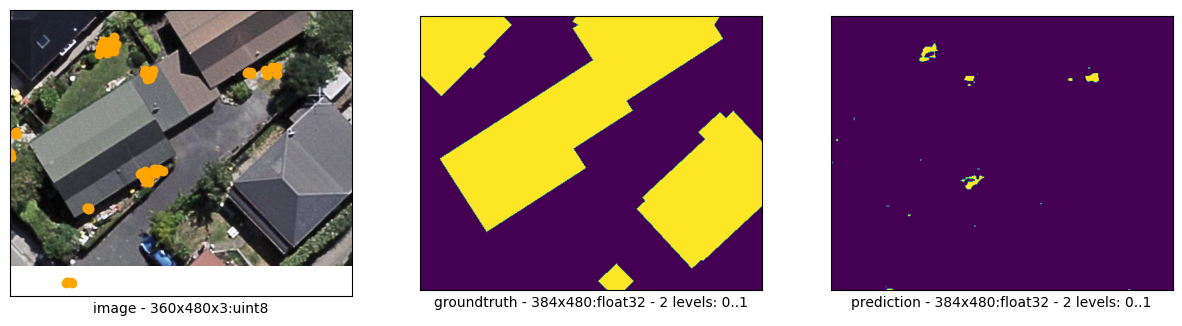

100%|██████████| 1/1 [00:00<00:00, 901.81it/s]
🌀  blue_objects.graphics.gif.generate_animated_gif(1x759x1500) -scale=1-> /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/predict.gif @ 500.00ms


In [5]:
train(
    dataset_path=objects.object_path(dataset_object_name),
    model_path=objects.object_path(model_object_name),
    classes = ["roof"] if dataset_source == "AIRS" else ["car"],
    in_notebook=True,
    profile=profile,
);

In [6]:
assert notebooks.upload(model_object_name)

upload: ../../../../storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/model.json to s3://kamangir/bolt/train-ipynb-2025-01-13-11-56-17-np0nvw/model.json
upload: ../../../../storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/predict-00000.json to s3://kamangir/bolt/train-ipynb-2025-01-13-11-56-17-np0nvw/predict-00000.json
upload: ../../../../storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/predict.gif to s3://kamangir/bolt/train-ipynb-2025-01-13-11-56-17-np0nvw/predict.gif
upload: ../../../../storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/train-summary.png to s3://kamangir/bolt/train-ipynb-2025-01-13-11-56-17-np0nvw/train-summary.png
upload: ../../../../storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/augmented_dataset-00000.png to s3://kamangir/bolt/train-ipynb-2025-01-13-11-56-17-np0nvw/augmented_dataset-00000.png
upload: ../../../../storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/dataset.png to s3://kamangir/bolt/train-ipynb-2025-01-13-11-56-17-np0nvw/dataset.

🌀  ⏺️  train-ipynb-2025-01-13-11-56-17-np0nvw | 00001
🌀  ⬆️  /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/predict.gif
🌀  ⬆️  /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/model.json
🌀  ⬆️  /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/predict-00000.json
🌀  ⬆️  /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/predict-00000.png
🌀  ⬆️  /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/dataset.png
🌀  ⬆️  /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/augmented_dataset-00000.png
🌀  ⬆️  /Users/kamangir/storage/abcli/train-ipynb-2025-01-13-11-56-17-np0nvw/train-summary.png


🏃 View run train-ipynb-2025-01-13-11-56-17-np0nvw-00001 at: https://dbc-3ac1d106-bf0c.cloud.databricks.com/ml/experiments/2112121106209298/runs/cf7076e1f28147f8b886711963e9a739
🧪 View experiment at: https://dbc-3ac1d106-bf0c.cloud.databricks.com/ml/experiments/2112121106209298


🌀  ⏹️  train-ipynb-2025-01-13-11-56-17-np0nvw


In [7]:
# END